In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import openpyxl
import pandas as pd
import pickle
import random
import sys

from cycler import cycler
from PIL import Image

In [15]:
sys.path.append("/kvh4/optic_disc/scripts") 

from evaluation_functions import load_pred, generate_mean_pred, generate_voxelwise_uncertainty

In [3]:
filepath = "/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training"
with open(os.path.join(filepath, "dataset_splits_nonglaucoma_600_100.pkl"), 'rb') as file:
    data_dict = pickle.load(file)

In [4]:
data_dict.keys()

dict_keys(['training_images', 'training_gt', 'validation_images', 'validation_gt', 'test_images', 'test_gt'])

In [7]:
random_choice = random.choice(data_dict["test_images"])

In [8]:
random_choice

'/kvh4/optic_disc/data/REFUGE-2/REFUGE2-Training/resized_data/non_glaucoma/images/n0142.jpg'

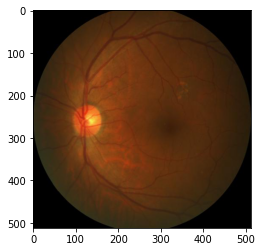

In [11]:
plt.imshow(np.asarray(Image.open(random_choice)))

In [ ]:
/models/dice_ensemble/test_pred/n0142.npy
load_pred(data_dir, case_name)

In [17]:
random_choice_pred = load_pred("/kvh4/optic_disc/models/dice_ensemble/test_pred", "n0142")

In [18]:
random_choice_pred.shape

(512, 512, 10)

In [19]:
random_choice_unc = generate_voxelwise_uncertainty(random_choice_pred)

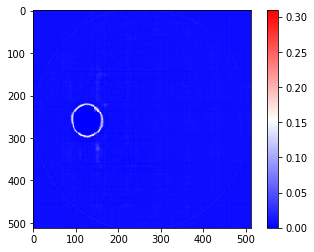

In [24]:
plt.imshow(random_choice_unc, cmap="bwr")
plt.colorbar()

In [28]:
dice_ensemble_data = pd.read_excel("/kvh4/optic_disc/results/dice_ensemble.xlsx", engine="openpyxl")

In [29]:
dice_ensemble_data

,Unnamed: 0,train_dice,train_ms,train_pw,test_dice,test_ms,test_pw,glaucoma_dice,glaucoma_ms,glaucoma_pw
0,0,0.952830,0.017971,0.939163,0.763704,0.061106,0.716765,0.865439,0.028014,0.827411
1,1,0.952887,0.030529,0.942300,0.866735,0.037376,0.824762,0.952238,0.015389,0.957602
2,2,0.910055,0.035242,0.925988,0.941214,0.018249,0.904996,0.871616,0.035890,0.815260
3,3,0.915534,0.015966,0.958815,0.960048,0.026161,0.949671,0.596506,0.060145,0.773596
4,4,0.930458,0.030636,0.934999,0.967818,0.020561,0.940729,0.758989,0.052009,0.714501
...,...,...,...,...,...,...,...,...,...,...
595,595,0.919740,0.014391,0.962454,NaN,NaN,NaN,NaN,NaN,NaN
596,596,0.892511,0.033053,0.932826,NaN,NaN,NaN,NaN,NaN,NaN
597,597,0.920701,0.030488,0.900451,NaN,NaN,NaN,NaN,NaN,NaN
598,598,0.946794,0.013332,0.968899,NaN,NaN,NaN,NaN,NaN,NaN


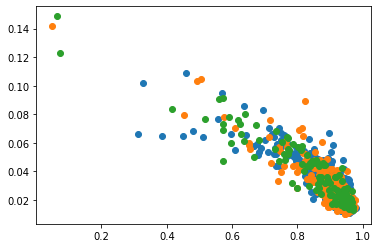

In [33]:
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_ms"] )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_ms"] )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_ms"])

In [38]:
CB_color_cycle = cycler(color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])
mpl.rcParams['axes.prop_cycle'] = CB_color_cycle
plt.rcParams['font.size'] = 9
plt.rcParams['axes.linewidth'] = 1
marker_s = 4

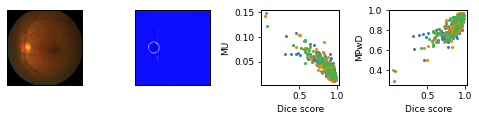

In [50]:
plt.subplots(1,4, figsize=(6.75,1.75))
plt.subplot(1,4,1)
plt.imshow(np.asarray(Image.open(random_choice)))
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.subplot(1,4,2)
plt.imshow(random_choice_unc, cmap="bwr")
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
# plt.colorbar()
plt.subplot(1,4,3)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_ms"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_ms"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_ms"],s=marker_s)
plt.ylabel("MU")
plt.xlabel("Dice score")

plt.subplot(1,4,4)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_pw"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_pw"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_pw"],s=marker_s)
plt.ylabel("MPwD")
plt.xlabel("Dice score")

plt.tight_layout()
plt.savefig("intro_fig.png", dpi=600)

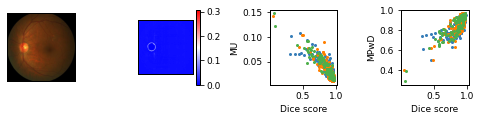

In [54]:
plt.subplots(1,4, figsize=(6.75,1.75))
plt.subplot(1,4,1)
plt.imshow(np.asarray(Image.open(random_choice)))
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.subplot(1,4,2)
plt.imshow(random_choice_unc, cmap="bwr")
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar()
plt.subplot(1,4,3)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_ms"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_ms"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_ms"],s=marker_s)
plt.ylabel("MU")
plt.xlabel("Dice score")

plt.subplot(1,4,4)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_pw"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_pw"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_pw"],s=marker_s)
plt.ylabel("MPwD")
plt.xlabel("Dice score")

plt.tight_layout()
plt.savefig("intro_fig.png", dpi=600)

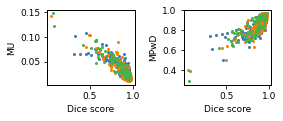

In [53]:
plt.subplots(1,2, figsize=(4,1.75))
plt.subplot(1,2,1)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_ms"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_ms"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_ms"],s=marker_s)
plt.ylabel("MU")
plt.xlabel("Dice score")

plt.subplot(1,2,2)
plt.scatter(dice_ensemble_data["train_dice"],dice_ensemble_data["train_pw"],s=marker_s )
plt.scatter(dice_ensemble_data["test_dice"],dice_ensemble_data["test_pw"], s=marker_s )
plt.scatter(dice_ensemble_data["glaucoma_dice"],dice_ensemble_data["glaucoma_pw"],s=marker_s)
plt.ylabel("MPwD")
plt.xlabel("Dice score")

plt.tight_layout()
plt.savefig("intro_fig_scatter.png", dpi=600)